In [120]:
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [121]:
# load in data set
df = pd.read_csv('./data/kc_house_data.csv')

In [122]:
# initially inspect the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [123]:
# determine where nulls are in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

It appears that we only have two columns that contain null values: waterfront and yr_renovated.

In [124]:
df.dropna(subset=['waterfront', 'view'], inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19164 non-null  int64  
 1   date           19164 non-null  object 
 2   price          19164 non-null  float64
 3   bedrooms       19164 non-null  int64  
 4   bathrooms      19164 non-null  float64
 5   sqft_living    19164 non-null  int64  
 6   sqft_lot       19164 non-null  int64  
 7   floors         19164 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           19164 non-null  object 
 10  condition      19164 non-null  object 
 11  grade          19164 non-null  object 
 12  sqft_above     19164 non-null  int64  
 13  sqft_basement  19164 non-null  object 
 14  yr_built       19164 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        19164 non-null  int64  
 17  lat            19164 non-null  float64
 18  long  

In [126]:
df.yr_renovated.value_counts()

0.0       15111
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

Based on the above value counts, we will drop the yr_renovated column.

In [127]:
df.drop(columns='yr_renovated', axis=1, inplace=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19164 non-null  int64  
 1   date           19164 non-null  object 
 2   price          19164 non-null  float64
 3   bedrooms       19164 non-null  int64  
 4   bathrooms      19164 non-null  float64
 5   sqft_living    19164 non-null  int64  
 6   sqft_lot       19164 non-null  int64  
 7   floors         19164 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           19164 non-null  object 
 10  condition      19164 non-null  object 
 11  grade          19164 non-null  object 
 12  sqft_above     19164 non-null  int64  
 13  sqft_basement  19164 non-null  object 
 14  yr_built       19164 non-null  int64  
 15  zipcode        19164 non-null  int64  
 16  lat            19164 non-null  float64
 17  long           19164 non-null  float64
 18  sqft_l

In [129]:
df.zipcode.value_counts()

98103    539
98038    525
98115    513
98052    506
98117    495
        ... 
98102     89
98010     87
98024     72
98148     51
98039     45
Name: zipcode, Length: 70, dtype: int64

In [130]:
df_seattle = df[(df['zipcode'] >= 98101) & (df['zipcode'] <= 98199)]

In [131]:
df_seattle.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,98146,47.5123,-122.337,1780,8113
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,Good,7 Average,860,300.0,1942,98115,47.6900,-122.292,1330,6000
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,Average,7 Average,1810,0.0,1900,98107,47.6700,-122.394,1360,4850


In [132]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7949 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7949 non-null   int64  
 1   date           7949 non-null   object 
 2   price          7949 non-null   float64
 3   bedrooms       7949 non-null   int64  
 4   bathrooms      7949 non-null   float64
 5   sqft_living    7949 non-null   int64  
 6   sqft_lot       7949 non-null   int64  
 7   floors         7949 non-null   float64
 8   waterfront     7949 non-null   object 
 9   view           7949 non-null   object 
 10  condition      7949 non-null   object 
 11  grade          7949 non-null   object 
 12  sqft_above     7949 non-null   int64  
 13  sqft_basement  7949 non-null   object 
 14  yr_built       7949 non-null   int64  
 15  zipcode        7949 non-null   int64  
 16  lat            7949 non-null   float64
 17  long           7949 non-null   float64
 18  sqft_li

<AxesSubplot:>

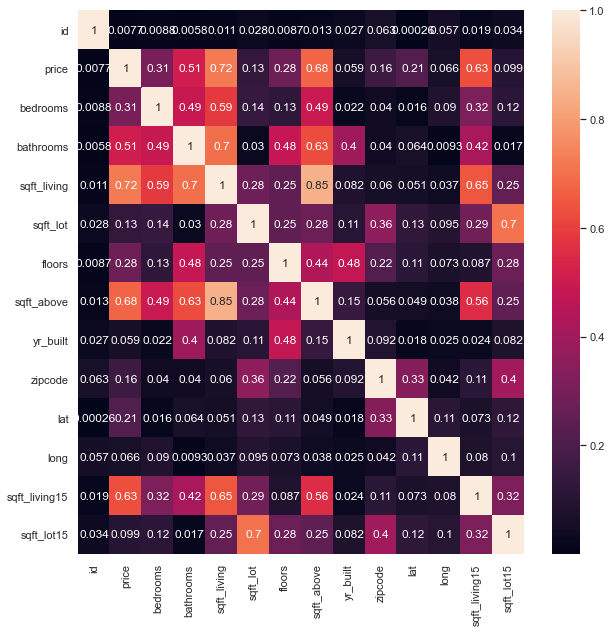

In [133]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(abs(df_seattle.corr()), annot=True)

# Create First Simple Model and Dummy Model

In [134]:
# create test train split for data
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

In [135]:
df_seattle.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,98146,47.5123,-122.337,1780,8113
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,Good,7 Average,860,300.0,1942,98115,47.6900,-122.292,1330,6000
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,Average,7 Average,1810,0.0,1900,98107,47.6700,-122.394,1360,4850


In [136]:
df_seattle = df_seattle[df_seattle['sqft_basement'] != '?']

In [137]:
X = df_seattle.drop(columns='price', axis=1)
y = df_seattle['price']

In [138]:
# Create train-test split for data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [139]:
# Confirm that X_train is three times larger than X_test
print(X_train.shape, X_test.shape)

(5819, 19) (1940, 19)


In [140]:
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,NO,NONE,Good,8 Good,1540,500.0,1917,98107,47.6608,-122.359,1620,4400
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,NO,NONE,Very Good,7 Average,1420,80.0,1929,98103,47.6893,-122.350,1480,3774
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,NO,NONE,Average,7 Average,1250,300.0,1952,98118,47.5413,-122.281,2120,7268
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,NO,NONE,Very Good,7 Average,1630,910.0,1925,98103,47.6832,-122.343,1560,3920
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,NO,NONE,Average,7 Average,1140,0.0,1960,98106,47.5535,-122.362,1140,5000


## Dummy Regressor Model

We chose to use the median as our dummy regression strategy because home prices tend to be skewed based on outliers.

In [141]:
dummy_regr = DummyRegressor(strategy='median')

In [142]:
dummy_model = dummy_regr.fit(X_train, y_train)

In [143]:
dummy_model.predict(X_test)

array([459000., 459000., 459000., ..., 459000., 459000., 459000.])

In [144]:
dummy_model.score(X_test, y_test)

-0.041010625944327694

As expected, very little correlation between inputs and outputs with this model. Next, we will create our first simple model based on the feature with the highest correlation to price (sqft_living).

In [145]:
slr = LinearRegression()
slr_fit = slr.fit(np.array(X_train['sqft_living']).reshape(-1, 1), np.array(y_train).reshape(-1,1))
simple_train_score = slr_fit.score(np.array(X_train['sqft_living']).reshape(-1,1), np.array(y_train).reshape(-1,1))
simple_test_score = slr_fit.score(np.array(X_test['sqft_living']).reshape(-1,1), np.array(y_test).reshape(-1,1))

In [146]:
print(simple_train_score, simple_test_score)

0.5271789814750716 0.5136487778268353


# Feature Engineering

In [147]:
# (1) Create a variable condition_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
# We'll do these transforms
condition_X_train = X_train[["condition"]]
condition_X_test = X_test[['condition']]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on training set
ohe.fit(condition_X_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [148]:
trans_condition_X_train = ohe.transform(condition_X_train)
trans_condition_X_test = ohe.transform(condition_X_test)

In [149]:
# (5a) Make the transformed data into a dataframe
encoded_X_train = pd.DataFrame(
    # Pass in NumPy array
    trans_condition_X_train,
    # Set the column names to the categories found by OHE
    columns='Cond_' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

encoded_X_test = pd.DataFrame(
    # Pass in NumPy array
    trans_condition_X_test,
    # Set the column names to the categories found by OHE
    columns='Cond_' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_test.index
)

# Visually inspect new dataframe
encoded_X_train

,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good
12171,0.0,0.0,1.0,0.0,0.0
11338,0.0,0.0,0.0,0.0,1.0
8169,1.0,0.0,0.0,0.0,0.0
13395,0.0,0.0,0.0,0.0,1.0
2209,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6060,0.0,0.0,1.0,0.0,0.0
6753,0.0,0.0,0.0,0.0,1.0
5642,1.0,0.0,0.0,0.0,0.0
3781,1.0,0.0,0.0,0.0,0.0


In [150]:
# add our encoded condition columns to our df_seattle dataframe
df_seattle1 = pd.concat([X_train, encoded_X_train], axis=1)
df_seattle1.drop(columns='condition', axis=1, inplace=True)
df_seattle1.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,NO,NONE,8 Good,...,98107,47.6608,-122.359,1620,4400,0.0,0.0,1.0,0.0,0.0
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,NO,NONE,7 Average,...,98103,47.6893,-122.350,1480,3774,0.0,0.0,0.0,0.0,1.0
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,NO,NONE,7 Average,...,98118,47.5413,-122.281,2120,7268,1.0,0.0,0.0,0.0,0.0
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,NO,NONE,7 Average,...,98103,47.6832,-122.343,1560,3920,0.0,0.0,0.0,0.0,1.0
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,NO,NONE,7 Average,...,98106,47.5535,-122.362,1140,5000,1.0,0.0,0.0,0.0,0.0


In [151]:
X_test = pd.concat([X_test, encoded_X_test], axis=1)
X_test.drop(columns='condition', axis=1, inplace=True)
X_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good
4693,9126101645,6/10/2014,4,2.00,2180,3870,1.0,NO,NONE,7 Average,...,98122,47.6089,-122.303,1520,2580,1.0,0.0,0.0,0.0,0.0
12863,3782100035,8/13/2014,3,1.00,960,8100,1.0,NO,NONE,7 Average,...,98155,47.7763,-122.305,1080,8100,1.0,0.0,0.0,0.0,0.0
7276,5605000430,9/17/2014,4,2.50,2790,5450,2.0,NO,NONE,10 Very Good,...,98112,47.6453,-122.303,2320,5450,1.0,0.0,0.0,0.0,0.0
21360,1282300995,2/22/2015,3,2.25,1310,915,2.0,NO,NONE,7 Average,...,98144,47.5738,-122.293,1500,1215,1.0,0.0,0.0,0.0,0.0
1687,2767604247,7/11/2014,2,2.50,1140,1181,3.0,NO,NONE,8 Good,...,98107,47.6713,-122.383,1220,1189,1.0,0.0,0.0,0.0,0.0


In [152]:
df_seattle1.view.value_counts()

NONE         5075
AVERAGE       319
GOOD          176
FAIR          130
EXCELLENT     119
Name: view, dtype: int64

In [153]:
# (1) Create a variable condition_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
# Do this for both test and train x sets
view_X_train = X_train[["view"]]
view_X_test = X_test[['view']]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on training set
ohe.fit(view_X_train)

# Inspect the categories of the fitted encoder
ohe.categories_

trans_view_X_train = ohe.transform(view_X_train)
trans_view_X_test = ohe.transform(view_X_test)

# (5a) Make the transformed data into a dataframe
encoded_X_train_view = pd.DataFrame(
    # Pass in NumPy array
    trans_view_X_train,
    # Set the column names to the categories found by OHE
    columns='View_' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

encoded_X_test_view = pd.DataFrame(
    # Pass in NumPy array
    trans_view_X_test,
    # Set the column names to the categories found by OHE
    columns='View_' + ohe.categories_[0],
    # Set the index to match X_test's index
    index=X_test.index)

# Visually inspect new dataframe
encoded_X_train_view

,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
12171,0.0,0.0,0.0,0.0,1.0
11338,0.0,0.0,0.0,0.0,1.0
8169,0.0,0.0,0.0,0.0,1.0
13395,0.0,0.0,0.0,0.0,1.0
2209,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
6060,0.0,0.0,0.0,0.0,1.0
6753,0.0,1.0,0.0,0.0,0.0
5642,0.0,0.0,0.0,0.0,1.0
3781,0.0,0.0,0.0,0.0,1.0


In [154]:
# add our encoded condition columns to our df_seattle dataframe
df_seattle2 = pd.concat([df_seattle1, encoded_X_train_view], axis=1)
df_seattle2.drop(columns='view', axis=1, inplace=True)
df_seattle2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,NO,8 Good,1540,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,NO,7 Average,1420,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,NO,7 Average,1250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,NO,7 Average,1630,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,NO,7 Average,1140,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [155]:
X_test = pd.concat([X_test, encoded_X_test_view], axis=1)
X_test.drop(columns='view', axis=1, inplace=True)
X_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
4693,9126101645,6/10/2014,4,2.00,2180,3870,1.0,NO,7 Average,1020,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12863,3782100035,8/13/2014,3,1.00,960,8100,1.0,NO,7 Average,960,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7276,5605000430,9/17/2014,4,2.50,2790,5450,2.0,NO,10 Very Good,1930,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21360,1282300995,2/22/2015,3,2.25,1310,915,2.0,NO,7 Average,1060,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1687,2767604247,7/11/2014,2,2.50,1140,1181,3.0,NO,8 Good,1140,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [156]:
df_seattle2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,NO,8 Good,1540,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,NO,7 Average,1420,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,NO,7 Average,1250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,NO,7 Average,1630,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,NO,7 Average,1140,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [157]:
# (0) import OrdinalEncoder from sklearn.preprocessing

# (1) Create a variable street_train that contains the
# relevant column from X_train
# (Use double brackets [[]] to get the appropriate shape)
# Perform for both X train and test sets
waterfront_train = X_train[['waterfront']]
waterfront_test = X_test[['waterfront']]

# (2) Instantiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# (3) Fit the encoder on training set
encoder_waterfront.fit(waterfront_train)

# Inspect the categories of the fitted encoder
encoder_waterfront.categories_[0]
encoder_waterfront.categories_[0]



array(['NO', 'YES'], dtype=object)

In [158]:
# (4) Transform street_train using the encoder and
# assign the result to street_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test)

# Flatten for appropriate shape
waterfront_encoded_train = waterfront_encoded_train.flatten()
waterfront_encoded_test = waterfront_encoded_test.flatten()

# Visually inspect street_encoded_train
waterfront_encoded_train
waterfront_encoded_test

array([0., 0., 0., ..., 0., 0., 0.])

In [159]:
# (5) Replace value of Street
df_seattle2["waterfront"] = waterfront_encoded_train
X_test['waterfront'] = waterfront_encoded_test

# Visually inspect X_train
df_seattle2.head()
X_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
4693,9126101645,6/10/2014,4,2.00,2180,3870,1.0,0.0,7 Average,1020,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12863,3782100035,8/13/2014,3,1.00,960,8100,1.0,0.0,7 Average,960,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7276,5605000430,9/17/2014,4,2.50,2790,5450,2.0,0.0,10 Very Good,1930,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21360,1282300995,2/22/2015,3,2.25,1310,915,2.0,0.0,7 Average,1060,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1687,2767604247,7/11/2014,2,2.50,1140,1181,3.0,0.0,8 Good,1140,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [160]:
df_seattle2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 12171 to 12721
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5819 non-null   int64  
 1   date            5819 non-null   object 
 2   bedrooms        5819 non-null   int64  
 3   bathrooms       5819 non-null   float64
 4   sqft_living     5819 non-null   int64  
 5   sqft_lot        5819 non-null   int64  
 6   floors          5819 non-null   float64
 7   waterfront      5819 non-null   float64
 8   grade           5819 non-null   object 
 9   sqft_above      5819 non-null   int64  
 10  sqft_basement   5819 non-null   object 
 11  yr_built        5819 non-null   int64  
 12  zipcode         5819 non-null   int64  
 13  lat             5819 non-null   float64
 14  long            5819 non-null   float64
 15  sqft_living15   5819 non-null   int64  
 16  sqft_lot15      5819 non-null   int64  
 17  Cond_Average    5819 non-nul

In [161]:
grade_X_train = X_train[["grade"]]
grade_X_test = X_test[['grade']]

ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

ohe.fit(grade_X_train)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [162]:
trans_grade_X_train = ohe.transform(grade_X_train)
trans_grade_X_test = ohe.transform(grade_X_test)

# (5a) Make the transformed data into a dataframe
graded_X_train = pd.DataFrame(
    # Pass in NumPy array
    trans_grade_X_train,
    # Set the column names to the categories found by OHE
    columns='grade' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

graded_X_test = pd.DataFrame(
    # Pass in NumPy array
    trans_grade_X_test,
    # Set the column names to the categories found by OHE
    columns='grade' + ohe.categories_[0],
    # Set the index to match X_test's index
    index=X_test.index
)

In [163]:
df_seattle3 = pd.concat([df_seattle2, graded_X_train], axis=1)
df_seattle3.drop(columns='grade', axis=1, inplace=True)
df_seattle3.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade7 Average,grade8 Good,grade9 Better
12171,6610000320,9/10/2014,3,1.75,2040,4125,1.5,0.0,1540,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11338,6430500238,12/16/2014,4,1.50,1500,3075,2.0,0.0,1420,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8169,3333002710,9/17/2014,3,1.00,1550,8778,1.0,0.0,1250,300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13395,9482700455,10/21/2014,4,2.75,2540,4400,1.5,0.0,1630,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2209,3438500339,5/26/2014,3,1.00,1140,5000,1.0,0.0,1140,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [164]:
X_test = pd.concat([X_test, graded_X_test], axis=1)
X_test.drop(columns='grade', axis=1, inplace=True)
X_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade7 Average,grade8 Good,grade9 Better
4693,9126101645,6/10/2014,4,2.00,2180,3870,1.0,0.0,1020,1160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12863,3782100035,8/13/2014,3,1.00,960,8100,1.0,0.0,960,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7276,5605000430,9/17/2014,4,2.50,2790,5450,2.0,0.0,1930,860.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21360,1282300995,2/22/2015,3,2.25,1310,915,2.0,0.0,1060,250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1687,2767604247,7/11/2014,2,2.50,1140,1181,3.0,0.0,1140,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [165]:
seattle_final = df_seattle3.drop(columns=['grade7 Average','Cond_Average', 'View_AVERAGE'], axis=1)
X_test.drop(columns=['grade7 Average', 'Cond_Average', 'View_AVERAGE'], axis=1, inplace=True)

In [166]:
seattle_final.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Cond_Fair',
       'Cond_Good', 'Cond_Poor', 'Cond_Very Good', 'View_EXCELLENT',
       'View_FAIR', 'View_GOOD', 'View_NONE', 'grade10 Very Good',
       'grade11 Excellent', 'grade12 Luxury', 'grade13 Mansion', 'grade4 Low',
       'grade5 Fair', 'grade6 Low Average', 'grade8 Good', 'grade9 Better'],
      dtype='object')

In [167]:
X_test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Cond_Fair',
       'Cond_Good', 'Cond_Poor', 'Cond_Very Good', 'View_EXCELLENT',
       'View_FAIR', 'View_GOOD', 'View_NONE', 'grade10 Very Good',
       'grade11 Excellent', 'grade12 Luxury', 'grade13 Mansion', 'grade4 Low',
       'grade5 Fair', 'grade6 Low Average', 'grade8 Good', 'grade9 Better'],
      dtype='object')

# Look into how location affects price


In [168]:
df_loc = seattle_final[['zipcode', 'lat', 'long']]
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 12171 to 12721
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  5819 non-null   int64  
 1   lat      5819 non-null   float64
 2   long     5819 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 181.8 KB


In [169]:
df_loc_price = pd.concat([df_loc, y_train], axis=1)

In [170]:
df_loc_price.head()

,zipcode,lat,long,price
12171,98107,47.6608,-122.359,710500.0
11338,98103,47.6893,-122.350,651500.0
8169,98118,47.5413,-122.281,299000.0
13395,98103,47.6832,-122.343,696500.0
2209,98106,47.5535,-122.362,276000.0


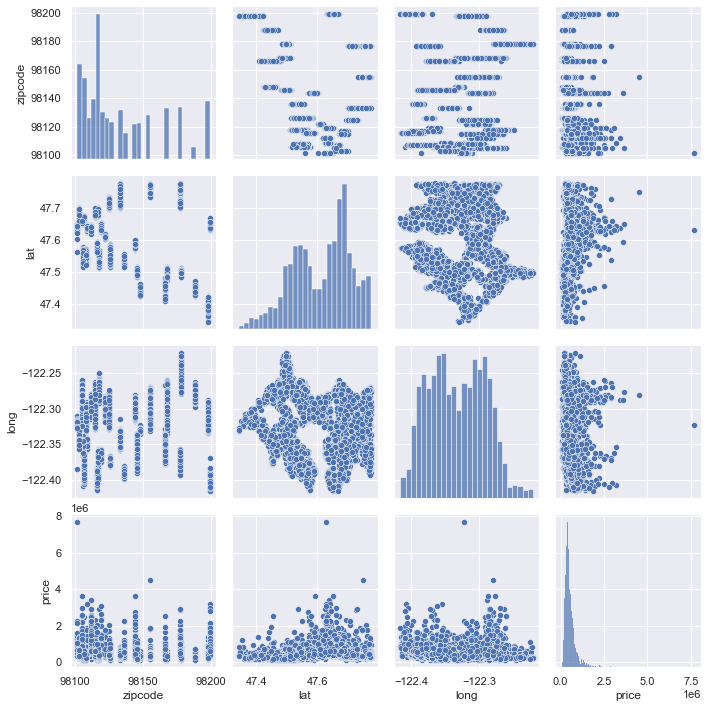

In [171]:
sns.pairplot(df_loc_price)

Based on the pairplots for price compared to latitude and longitude, there are distinct peaks that have more higher priced houses based on location. At the moment, our model is treating zip codes in Seattle, WA as numerical data when it should be categorical. We will use OHE to create a column for each zip code and proceed to drop the column that has the highest value count (most frequent zip code). 

In [172]:
df_loc_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 12171 to 12721
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  5819 non-null   int64  
 1   lat      5819 non-null   float64
 2   long     5819 non-null   float64
 3   price    5819 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 227.3 KB


In [173]:
X_train_loc = df_loc_price.drop(columns='price', axis=1)

In [174]:
X_train_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 12171 to 12721
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  5819 non-null   int64  
 1   lat      5819 non-null   float64
 2   long     5819 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 181.8 KB


In [175]:
# (1) Create a variable condition_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
# Do this for both test and train x sets
zip_X_train = X_train[['zipcode']]
zip_X_test = X_test[['zipcode']]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on training set
ohe.fit(zip_X_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array([98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115,
        98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136,
        98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188,
        98198, 98199])]

In [176]:
trans_zip_X_train = ohe.transform(zip_X_train)
trans_zip_X_test = ohe.transform(zip_X_test)

zip_list = []
for category in ohe.categories_[0]:
    zip_list.append('zip_' + category.astype('str'))
    
zip_list

['zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199']

In [177]:
# (5a) Make the transformed data into a dataframe
encoded_X_train_zip = pd.DataFrame(
    # Pass in NumPy array
    trans_zip_X_train,
    # Set the column names to the categories found by OHE
    columns=zip_list,
    # Set the index to match X_train's index
    index=X_train.index
)

encoded_X_test_zip = pd.DataFrame(
    # Pass in NumPy array
    trans_zip_X_test,
    # Set the column names to the categories found by OHE
    columns=zip_list,
    # Set the index to match X_test's index
    index=X_test.index)

# Visually inspect new dataframe
encoded_X_train_zip

,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
12171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11338,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13395,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2209,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
zip_counts_train = {}
zip_counts_test = {}
for column in encoded_X_train_zip.columns:
    summation = encoded_X_train_zip.sum()
    summation2 = encoded_X_test_zip.sum()
    zip_counts_train[column] = summation
    zip_counts_test[column] = summation2
    
zip_counts_test

{'zip_98102': zip_98102     30.0
 zip_98103    132.0
 zip_98105     54.0
 zip_98106     63.0
 zip_98107     68.0
 zip_98108     42.0
 zip_98109     17.0
 zip_98112     51.0
 zip_98115    115.0
 zip_98116     71.0
 zip_98117    106.0
 zip_98118    110.0
 zip_98119     32.0
 zip_98122     75.0
 zip_98125     94.0
 zip_98126     64.0
 zip_98133    105.0
 zip_98136     54.0
 zip_98144     72.0
 zip_98146     56.0
 zip_98148     15.0
 zip_98155    104.0
 zip_98166     62.0
 zip_98168     50.0
 zip_98177     67.0
 zip_98178     62.0
 zip_98188     35.0
 zip_98198     64.0
 zip_98199     70.0
 dtype: float64,
 'zip_98103': zip_98102     30.0
 zip_98103    132.0
 zip_98105     54.0
 zip_98106     63.0
 zip_98107     68.0
 zip_98108     42.0
 zip_98109     17.0
 zip_98112     51.0
 zip_98115    115.0
 zip_98116     71.0
 zip_98117    106.0
 zip_98118    110.0
 zip_98119     32.0
 zip_98122     75.0
 zip_98125     94.0
 zip_98126     64.0
 zip_98133    105.0
 zip_98136     54.0
 zip_98144     72

In [179]:
encoded_X_train_zip.drop(columns='zip_98103', axis=1, inplace=True)
encoded_X_test_zip.drop(columns='zip_98103', axis=1, inplace=True)

In [180]:
X_test_loc = X_test[['zipcode', 'lat', 'long']]

In [181]:
X_train_zip = pd.concat([X_train_loc, encoded_X_train_zip], axis=1).drop(columns='zipcode', axis=1)
X_test_zip = pd.concat([X_test_loc, encoded_X_test_zip], axis=1).drop(columns='zipcode', axis=1)
X_test_zip.head()

,lat,long,zip_98102,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
4693,47.6089,-122.303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12863,47.7763,-122.305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7276,47.6453,-122.303,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21360,47.5738,-122.293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1687,47.6713,-122.383,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, we'll perform a multiple linear regression using our 3 location factors before transforming any columns.

In [182]:
mlr = LinearRegression()

In [183]:
len(X_train_loc)

5819

In [185]:
len(y_train)

5819

In [186]:
mlr_fit = mlr.fit(np.array(X_train_zip).reshape(-1,30), np.array(y_train).reshape(-1,1))

In [187]:
mlr_fit.score(np.array(X_train_zip).reshape(-1,30), np.array(y_train).reshape(-1,1))

0.3101920204562858

In [189]:
mlr_fit.score(np.array(X_test_zip).reshape(-1,30), np.array(y_test).reshape(-1,1))

0.3118036090576046

In [190]:
mlr_fit.coef_

array([[-470260.18499195, 2288525.83517235,  292101.48308554,
         158883.2401366 , -312127.14125572,   43794.98235045,
        -380218.84691163,  252154.05080617,  404484.42491675,
         -67478.53055829,   83857.85560508,   63443.56485089,
        -391328.4131739 ,  317973.76195326,  -84802.57586436,
        -208300.43678197, -157155.2834951 , -169865.00214732,
         -13664.16086382, -131637.62029183, -284923.77528084,
        -434664.96765636, -221791.24887107, -208385.74388882,
        -518106.37604815,  172104.09214623, -580024.11461888,
        -554109.96080814, -474349.53776602,  345125.17718372]])

Based on our score above, our model does very poorly at modeling the data based on the raw location columns. I will now perform feature engineering to modify our inputs to better model the price of homes in King County.

In [192]:
pf2 = PolynomialFeatures(2)

In [199]:
X_train_pf2 = pf2.fit(X_train_zip)

In [201]:
X_train_pf2_trans = pf2.transform(X_train_zip)

In [203]:
mlr_fit2 = mlr.fit(np.array(X_train_pf2_trans).reshape(-1,496), np.array(y_train).reshape(-1,1))

In [205]:
X_test_pf2_trans = pf2.transform(X_test_zip)

In [208]:
mlr_fit2.score(np.array(X_train_pf2_trans).reshape(-1,496), np.array(y_train).reshape(-1,1))

0.44152449180774

In [209]:
mlr_fit2.score(np.array(X_test_pf2_trans).reshape(-1,496), np.array(y_test).reshape(-1,1))

0.39841739224203054

By applying a polynomial transform to our location data, the variance in our home prices appears to be better represented by our inputs. We will iterate through this process to determine if increasing the polynomial degree improves our $r^2$ coefficient.

In [211]:
pf3 = PolynomialFeatures(3)
X_train_pf3 = pf3.fit(X_train_zip)
X_train_pf3_trans = pf3.transform(X_train_zip)
mlr_fit3 = mlr.fit(np.array(X_train_pf3_trans).reshape(-1,5456), np.array(y_train).reshape(-1,1))

In [212]:
X_test_pf3_trans = pf3.transform(X_test_zip)
mlr_fit3.score(np.array(X_train_pf3_trans).reshape(-1,5456), np.array(y_train).reshape(-1,1))

0.5073133383414837

In [213]:
mlr_fit3.score(np.array(X_test_pf3_trans).reshape(-1,5456), np.array(y_test).reshape(-1,1))

0.4543274701222929

Given that for our previous models, the r2 score is significantly higher for our training data, which means that we may have slightly overfit our model to the data. 

This correlation score is improving, but we would like to create a model with more correlation between our inputs and home price. Next, I will try to create simple features based on latitude, longitude, and zip code to improve the model.

In [216]:
X_train_latlong = X_train_zip.copy()
X_train_latlong['lat * long'] = X_train_latlong['lat'] * X_train_latlong['long']
X_train_latlong.drop(columns=['lat', 'long'], axis=1, inplace=True)

X_test_latlong = X_test_zip.copy()
X_test_latlong['lat * long'] = X_test_latlong['lat'] * X_test_latlong['long']
X_test_latlong.drop(columns=['lat', 'long'], axis=1, inplace=True)


In [223]:
X_train_latlong_pf3 = pf3.fit(X_train_latlong)
X_train_latlong_pf3_trans = pf3.transform(X_train_latlong)

X_test_latlong_pf3 = pf3.fit(X_test_latlong)
X_test_latlong_pf3_trans = pf3.transform(X_test_latlong)

In [220]:
latlong_pf3_train = mlr.fit(np.array(X_train_latlong_pf3_trans).reshape(-1,4960), np.array(y_train).reshape(-1,1))

In [222]:
mlr.score(np.array(X_train_latlong_pf3_trans).reshape(-1,4960), np.array(y_train).reshape(-1,1))

0.35529784259382513

In [224]:
mlr.score(np.array(X_test_latlong_pf3_trans).reshape(-1,4960), np.array(y_test).reshape(-1,1))

0.34133335053145175

I will now try to add in more inputs to boost our pf3 model (sqft_living and sqft_living15).

In [228]:
X_train_loc_sqft = pd.concat([X_train_zip, df_seattle2[['sqft_living', 'sqft_living15']]], axis=1)
X_test_loc_sqft = pd.concat([X_test_zip, X_test[['sqft_living', 'sqft_living15']]], axis=1)
X_train_loc_sqft.head()

,lat,long,zip_98102,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,...,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,sqft_living,sqft_living15
12171,47.6608,-122.359,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2040,1620
11338,47.6893,-122.350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500,1480
8169,47.5413,-122.281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1550,2120
13395,47.6832,-122.343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2540,1560
2209,47.5535,-122.362,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1140,1140


In [233]:
X_train_full_pf3 = pf3.fit(X_train_loc_sqft)
X_train_full_pf3_trans = pf3.transform(X_train_loc_sqft)
mlr_pf3_full = mlr.fit(np.array(X_train_full_pf3_trans).reshape(-1,6545), np.array(y_train).reshape(-1,1))

In [234]:
X_test_full_pf3_trans = pf3.transform(X_test_loc_sqft)
mlr_pf3_full.score(np.array(X_train_full_pf3_trans).reshape(-1,6545), np.array(y_train).reshape(-1,1))

0.8684781324226145

In [235]:
mlr_pf3_full.score(np.array(X_test_full_pf3_trans).reshape(-1,6545), np.array(y_test).reshape(-1,1))

0.7747916785327933

It appears that this model still slightly overfits our data, but the correlation values are much higher than without the inclusion of sqft data. We can try to mitigate this through cross validation of multiple train_test splits. 

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
df_seattle2.drop(columns=['id', 'date', 'waterfront', 'grade'], axis=1, inplace=True)

In [ ]:
df_seattle2['sqft_basement'] = df_seattle2['sqft_basement'].astype('float')

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(df_seattle2)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(df_seattle2.columns):
    print(f"{col}: {selector.support_[index]}")

Based on the RFECV analysis performed above, we can drop the sqft_lot column and run a multiple linear regression model with all other variables. We will also drop the View_AVERAGE and Cond_Average columns because we need to drop one column for one hot encoder.

In [ ]:
df_seattle2.drop(columns=['sqft_lot', 'Cond_Average', 'View_AVERAGE'], axis=1, inplace=True)

In [ ]:
col_list = list(df_seattle2.columns)
X_test = X_test[X_test.columns[X_test.columns.isin(col_list)]]
X_test.columns

In [ ]:
RFECV_mlr = LinearRegression().fit(np.array(df_seattle2).reshape(-1,20), np.array(y_train).reshape(-1,1))

In [ ]:
RFECV_mlr.score(np.array(X_test).reshape(-1,20), np.array(y_test).reshape(-1,1))

In [ ]:
# We will also check for error values now
from sklearn.metrics import mean_squared_error, r2_score

y_hat = RFECV_mlr.predict(np.array(X_test).reshape(-1,20))
r2_RFECV = r2_score(y_test, y_hat)
RMSE_RFECV = mean_squared_error(y_test, y_hat)
print('r\u00b2:' + str(r2_RFECV))
print('RMSE: ' + str(RMSE_RFECV))

Not bad! Let's see if we can bump that score up a bit more with some feature engineering. First, we will check for collinearity between features in order to drop more. 

In [ ]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

dfcorr=df_seattle2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
dfcorr['pairs'] = list(zip(dfcorr.level_0, dfcorr.level_1))

# set index to pairs
dfcorr.set_index(['pairs'], inplace = True)

#d rop level columns
dfcorr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
dfcorr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
dfcorr.drop_duplicates(inplace=True)

In [ ]:
dfcorr

Given the correlation value of greater than 0.7 for the pair (sqft_above, sqft_living), we will drop one of these columns. I'm choosing to drop sqft_above because this value is the same as sqft_living for any houses with no basement. 

In [ ]:
df_seattle2.drop(columns='sqft_above', axis=1, inplace=True)

In [ ]:
X_test.drop(columns='sqft_above', axis=1, inplace=True)

In [ ]:
RFECV_mlr2 = LinearRegression().fit(np.array(df_seattle2).reshape(-1,19), np.array(y_train).reshape(-1,1))

In [ ]:
RFECV_mlr2.score(np.array(X_test).reshape(-1,19), np.array(y_test).reshape(-1,1))

In [ ]:
y_hat2 = RFECV_mlr2.predict(np.array(X_test).reshape(-1,19))
r2_RFECV2 = r2_score(y_test, y_hat)
RMSE_RFECV2 = mean_squared_error(y_test, y_hat2)
print('r\u00b2:' + str(r2_RFECV))
print('RMSE: ' + str(RMSE_RFECV))

These scores are practically the same, so dropping the columns for multicollinearity did not improve our model. We will view the pairplot of our df_seattle2 dataframe to see which variables could benefit from a transform prior to fitting our model.

In [ ]:
sns.pairplot(df_seattle2.iloc[:, [0,1,2,3,4,5,6,7,8,9]])

It would appear that all values related to the square feet columns (sqft_living and sqft_living15) are slightly skewed to the right, so we will try to perform a log transformation to each of those columns.

In [ ]:
# create function to create log transform of column
def log_transform(df, column):
    df['log_' + column] = np.log(df[column])
    df.drop(columns=column, axis=1, inplace=True)
    return df
    

In [ ]:
df_seattle2 = log_transform(df_seattle2, 'sqft_living')

In [ ]:
df_seattle2 = log_transform(df_seattle2, 'sqft_living15')

In [ ]:
df_seattle2.head()

In [ ]:
X_test = log_transform(X_test, 'sqft_living')

In [ ]:
X_test = log_transform(X_test, 'sqft_living15')

In [ ]:
X_test.head()

In [ ]:
sns.pairplot(pd.DataFrame(df_seattle2.iloc[:, [-2, -1]]))

Now our sqft columns for living and living15 appear to be much more normal than before, we will run another RFECV model with these new inputs!

In [ ]:
RFECV_mlr3 = LinearRegression().fit(np.array(df_seattle2).reshape(-1,19), np.array(y_train).reshape(-1,1))

In [ ]:
RFECV_mlr3.score(np.array(X_test).reshape(-1,19), np.array(y_test).reshape(-1,1))

In [ ]:
y_hat3 = RFECV_mlr3.predict(np.array(X_test).reshape(-1,19))
r2_RFECV3 = r2_score(y_test, y_hat3)
RMSE_RFECV3 = mean_squared_error(y_test, y_hat3)
print('r\u00b2:' + str(r2_RFECV3))
print('RMSE: ' + str(RMSE_RFECV3))

By performing the log transform, we both increased our error and dropped or correlation value. Thus, our previous model (RFECV_mlr2) is still the best performing model. 

In [ ]:
y_hat2 = pd.DataFrame(y_hat2, columns=['Pred Price'])

In [ ]:
y_hat2.head()

In [ ]:
y_test.values

In [ ]:
y_hat2['Actual Price'] = y_test.values

In [ ]:
y_hat2.head()

In [ ]:
y_hat2['Residual'] = y_hat2['Actual Price'] - y_hat2['Pred Price']

In [ ]:
y_hat2.head()

### Now that we have our residual values for the second RFECV model, we can plot them to ensure there are no trends in the residuals.

In [ ]:
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, y_hat2['Pred Price'], alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Our data appears to be relatively linear outside of larger outliers. Our model appears to overpredict the price of home's with high list prices. Next, we will check for normality in our residuals.

In [ ]:
import statsmodels.api as sm
sm.graphics.qqplot(y_hat2['Residual'], dist=stats.norm, line='45', fit=True);